# 3. Machine Learning for Classification

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation
[Markdown version](notes/3.2-data-preparation.md)

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
# $data lets you use python variables
!wget $data -O data-week-3.csv 

--2022-09-26 00:01:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  4.27MB/s    in 0.2s    

2022-09-26 00:01:01 (4.27 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


It's uncomfortable to look at all the columns at the same time. We can transpose the dataframe (or head) and read it transposed.

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


This way we can quickly see every variable in the data and without scrolling or hiding.

Notice capitalization are not consistent. Recall the last session; turn the columns lowercase

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


All column names are lowercase and spaces in the data are now underscores

Now we check datatypes

In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Some things to note:
- seniorcitizen is not a string; int64 0 or 1
- monthlycharges should be a number but it's not

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

Let's try to convert this to a number

In [10]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

We see that there was an issue; it does not just contain numbers.

Missing data was denoted with a space in the data and we replaced all spaces with underscores. This created a string object, replacing all value with strings.

Pandas has a way to handle them, we can tell Pandas to replace things it cannot handle with NaN

In [11]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

Are any values null?

In [12]:
tc.isnull().sum()

11

In [13]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Indeed, we can see every totalcharges value that is not in index. Can replace with 0s

In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [15]:
df.totalcharges = df.totalcharges.fillna(0)

Perhaps not the best approach. Customer may have actually spent money, but we cannot know anyway.

0 not always the best approach in terms of common sense. But in practice its usually okay.

Now to look at churn

In [19]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

For machine learning, in classification, we are not interested in yes or no, but rather numbers. Let's convert to 0 (no) and 1 (yes.)

In [18]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Now write it back to churn

In [20]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

Summary:
- Loaded data, looked at it
- Spotted error with totalcharges
- Fixed error with totalcharges
- Converted churn variable (target) to binary clone (0s and 1s)

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

Recall that we split into train/validation/split in NumPy/Pandas. Now we will do so in **Scikit-Learn**.

Scikit-Learn is one of the most popular machine learning libraries and implements many popular algorithms and common utilities. We'll use it for train-test splitting.

In [21]:
from sklearn.model_selection import train_test_split

Can use **?** in notebooks to see documentation

In [22]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

We will use test_size to specify the test size split (20%) and random_state for repeatability.

Will split it two times; once to get the test set and once more to get train and validation sets.

In [23]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

Let's see the test set size

In [24]:
len(df_full_train), len(df_test)

(5634, 1409)

In [25]:
# Note that we need 25% split to get 20% of the original dataset size.
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

We can see test/val datasets have the same size, and train dataset has 4225 examples.

Now let us get the target variables.

In [26]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


Do not have to do this (does not affect ML model), but it is nicer when the indices are not shuffled.

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Again, use underlying NumPy array to grab values then delete from DataFrames

In [28]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

Helps us not accidentally use target variable when training the model.

May notice we did not delete target variable from the full dataframe (df_full_train). The reason for that is that we will look at the target variable more in the next lesson.

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [29]:
# Drop indices for readability
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head().T

,0,1,2,3,4
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


Check for missing values.

In [30]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No additional data preparation here, we already checked for missing values.

Let's look at the target variable.

In [31]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

We see that the number of churned users is almost 1/3rd of non-churned users. **0.269968** is our **churn rate**.

Just getting the mean() gives us the churn rate.

In [33]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

This works because, for a binary variable, the negative value is 0 and the positive value is 1, so only positive values contribute to the mean, giving us the same value as the proportion. Essentially:
- (# of 1s)/*n* = Churn Rate

Let's look at the other variables now. Let's check numerical and categorical variables

In [35]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Only tenure, monthlycharges, and totalcharges are numerical (seniorcitizen is a binary value.)

In [36]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [37]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

Let's take a look of the number of unique values for categorical variables.

In [38]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

Now we can look at churn rate by demographic.

#### Churn rate

In [39]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


For example, gender. Let's see churn rate among female customers

In [40]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

Churn rate for female customers is pretty close to the global churn rate.

In [44]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

Churn rate for male customers is pretty close to the global churn rate as well.

In [45]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [46]:
global_churn - churn_female

-0.006855983216553063

In [47]:
global_churn - churn_male

0.006754520462819769

Let's see for churn rate for customers who live with partners.

In [48]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [49]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [50]:
global_churn - churn_partner

0.06493474245795922

This is noticably less than the global rate.

In [51]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [52]:
global_churn - churn_no_partner

-0.05984095297455855

This is noticably *more* than the global rate. It seems to be about 6% less for those with partners and 6% more for those without partners.

It seems that *gender* does not matter for churn, where as having a *partner* does matter. This brings us to our first point.

### 1. **Churn rate** 
Difference between mean of the target variable and mean of categories for a feature. If this difference is greater than 0, it means that the category is less likely to churn, and if the difference is lower than 0, the group is more likely to churn. The larger differences are indicators that a variable is more important than others.
- If group rate churn rate < global churn rate
    - Group is less likely to churn
- If group rate churn rate > global churn rate
    - Group is *more* likely to churn

Instead of comparing them, we can divide one by another, bringing us to our second point.

#### Risk ratio

Dividing the group churn rate by the global churn rate.

In [ ]:
churn_no_partner / global_churn

1.2216593879412643

The risk ratio for the no-partner group is greater than 1. They are *more* likely to churn.

In [ ]:
churn_partner / global_churn

0.7594724924338315

The risk ratio for the partner group is less than 1. They are *less* likely to churn. To explain risk ratio:

### 2. **Risk ratio** 
Ratio between mean of categories for a feature and mean of the target variable. If this ratio is greater than 1, the category is more likely to churn, and if the ratio is lower than 1, the category is less likely to churn. It expresses the feature importance in relative terms. 
- Risk = group / global
    - \> 1: more likely to churn
    - < 1: less likely to churn

We can see that the no-partner group is about 22% higher, the partner group is about 24% lower. Let's visualize this.

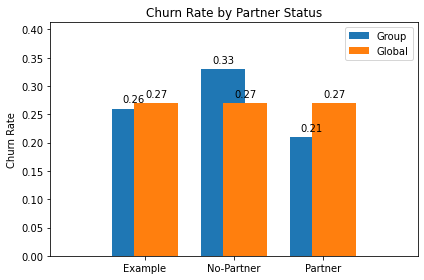

In [109]:
labels = ['Example', 'No-Partner', 'Partner']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/4, [round(global_churn-0.01, 2), round(churn_no_partner, 2), round(churn_partner, 2)], width, label='Group')
rects2 = ax.bar(x + width/4, [round(global_churn, 2), round(global_churn, 2), round(global_churn, 2)], width, label='Global')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.margins(0.25)
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Partner Status')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()

plt.show()

- For the control group, we see there is about the same risk as every other user.
- For the no-partner group, the risk ratio is 22%. They are **high risk**.
- For the partner group, the risk ratio is -6%. They are **low risk**.

We can implement something like this in SQL.

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

Let's translate this to Pandas

In [116]:
from IPython.display import display

In [117]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

Need multiple statistics. Can use **.agg()** for this:

In [121]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


Want to do this for every categorical variable

In [123]:
# Need ipython display to make this look nice.
for category in categorical:
    print(category)
    df_group = df_full_train.groupby(category).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


- Senior citizens are more likely to churn
- People who have no partner are more likely to churn (vs less likely for partnered)
    - Important: Predictive power
- People who have no dependents are more likely to churn (vs less likely for with dependents)
    - Similar to partner
- Approximately the same for people with phone service
- People who have no phone service are much less likely, one line slightly less, multiple lines slightly likelier
- People with no internet are very likely to stay
- People with fiber optic internet are at high risk of churn
- People without online backup, device protection or tech support are highly likely to churn
- People with month-to-month are more likely to churn (people with long contracts are very unlikely to churn)
- People with paperless billing are more likely to churn
- People who pay with electronic check are highly likely to churn

A customer with, say, no partner, no kids, and a month-to-month plan are very likely to churn.
- Very unlikely for the opposite

Variables with a high risk ratio are the kind we want to use for ML algorithms.

It would be useful to have a number to describe how important a variable is overall.

## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

We are using this to measure the importance of a categorical variable.

Previously: we looked at risk ratio to see the importance of categorical variables. Applies to each value within a variables.
- E.g. variable `contract`
    - Can see that people on month-to-month contracts are more likely to churn than those on plans.

We can see that `contract` is important but not if it is more or less important than others. 

Intuition here: the higher the mutual information is, the more we learn about `churn` from a variable.

In [124]:
from sklearn.metrics import mutual_info_score

In [126]:
mutual_info_score?

Signature: mutual_info_score(labels_true, labels_pred, *, contingency=None)
Docstring:
Mutual Information between two clusterings.

The Mutual Information is a measure of the similarity between two labels
of the same data. Where :math:`|U_i|` is the number of the samples
in cluster :math:`U_i` and :math:`|V_j|` is the number of the
samples in cluster :math:`V_j`, the Mutual Information
between clusterings :math:`U` and :math:`V` is given as:

.. math::

    MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
    \log\frac{N|U_i \cap V_j|}{|U_i||V_j|}

This metric is independent of the absolute values of the labels:
a permutation of the class or cluster label values won't change the
score value in any way.

This metric is furthermore symmetric: switching :math:`U` (i.e
``label_true``) with :math:`V` (i.e. ``label_pred``) will return the
same score value. This can be useful to measure the agreement of two
independent label assignments strategies on the same dataset when the

Order does not matter.

In [125]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

Significant mutual information. If we know the contract type, we do learn a lot about potential churn.

In [ ]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

Very low mutual information. If we know the gender, we do not learn much about potential churn.

In [ ]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

Noticable mutual information. Not as much as contract type but much more than gender.

These are numbers are hard to interpet on their own, but we can tell the differences.

What we can do, is check the mutual information of every variable and order them.

In [127]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [129]:
# .apply() variable allows us to run a function on a Pandas Series
mi = df_full_train[categorical].apply(mutual_info_churn_score)  # only applies to categorical variables
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

- `contract` very important
- `onlinesecurity` to `dependents` are decently important.
- Notice a drop in order of magnitude at `partner`, and another for `multiplelines`
- We thought `partner` was relatively important, but was not important in the larger scheme of things

These useful variables are why ML actually works. Variables like contract, onlinesecurity, and techsupport actually give information on churn. 

These are the signals ML models use while training and allow them to make inference on unseen examples.

## 3.7 Feature importance: Correlation

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

Also known as Pearson's Correlation. Way to measure degree of dependency between two variables.
- Denoting correlation as *r*, -1 <= *r* <= 1
    - Positive correlation means they are proportional by a factor of abs(*r*)
    - Negative correlation means they are inversely proportional by a factor of abs(*r*)

E.g. variable *x* and *y*.
- Positive correlation means that as *x* grows, *y* grows as well
    - Negative correlation means that as *x* grows, *y* shrinks
- When correlation is between 0 and abs(0.1), the correlation is **low**
    - Increase in *x* rarely leads to an increase in *y*
    - When correlation is between 0.2 and 0.5 or -0.2 and 0.5, the correlation is **moderate**
        - Increase in *x* sometimes leads to an increase in *y*
    - When correlation is between 0.6 and 1.0 or -0.6 and 1.0, the correlation is **strong**
        - Increase in *x* often/always leads to an increase in *y*

In this case
- *y<sub>i</sub>* ∈ {0, 1}
- -∞ < *x* < ∞, *x* ∈ ℝ

E.g. *x* is tenure, *y* is churn.
- 0 < *x* <= 72
- For a positive correlation, if tenure ↑ then churn ↑
    - If *x* ↑ then *y* ↑.
- For a negative correlation, if tenure ↑ then churn ↓
    - If *x* ↑ then *y* ↓.
- For zero correlation, tenure does not really affect churn
    - *x* does not really affect *y*.

In [130]:
df_full_train.tenure.max()

72

Select numerical values, check the correlation between those and churn.

In [131]:
df_full_train[numerical].corrwith(df_full_train.churn)#.abs

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

The longer tenure or totalcharges, the less likely churn is (negative correlation).
- These are correlated, the longer you stay with a company the higher the total charges are.

With high monthly charges, the more likely one is to churn (positive correlation).

Can show this with tenure:

In [156]:
# People with the company for 0, 1 or 2 months
tenure_low = df_full_train[df_full_train.tenure <= 2].churn.mean()
tenure_low

0.5953420669577875

Churn rate is high for people with the company 2 months or less. But between 2 and 12 months:

In [157]:
tenure_med = df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()
tenure_med

0.3994413407821229

Churn rate is still pretty high but lower between 2 and 12 months. For more than a year:

In [158]:
tenure_long = df_full_train[df_full_train.tenure > 12].churn.mean()
tenure_long

0.17634908339788277

Churn rate is much lower after a year.

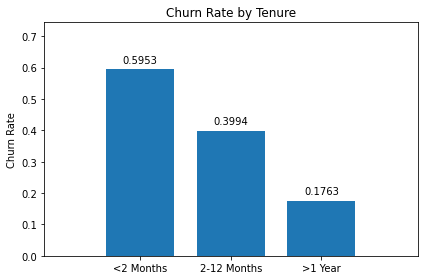

In [155]:
labels = ['<2 Months', '2-12 Months', '>1 Year']

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects = ax.bar(x, 
    [
        round(tenure_low, 4),
        round(tenure_med, 4),
        round(tenure_long, 4),
    ], 
    width = 0.75,
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.margins(0.25)
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Tenure')
ax.set_xticks(x, labels)

ax.bar_label(rects, padding=4)

fig.tight_layout()

plt.show()

Now let's look for monthly charges

For monthly charges less than $20:

In [159]:
charges_low = df_full_train[df_full_train.monthlycharges <= 20].churn.mean()
charges_low

0.08795411089866156

Churn rate is just less than 9%. Between $20 and $50:

In [160]:
charges_med = \
    df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()
charges_med

0.18340943683409436

Churn rate is 18%. For charges above $50:

In [161]:
charges_high = df_full_train[df_full_train.monthlycharges > 50].churn.mean()
charges_high

0.32499341585462205

Churn rate is 32.5%. This is much more important

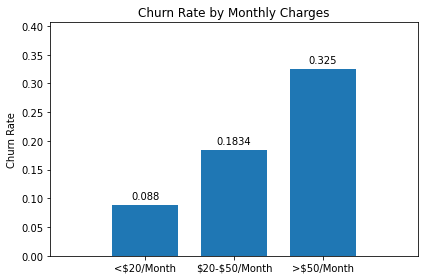

In [164]:
labels = ['<$20/Month', '\$20-\$50/Month', '>$50/Month']

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects = ax.bar(x, 
    [
        round(charges_low, 4),
        round(charges_med, 4),
        round(charges_high, 4),
    ], 
    width = 0.75,
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.margins(0.25)
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate by Monthly Charges')
ax.set_xticks(x, labels)

ax.bar_label(rects, padding=4)

fig.tight_layout()

plt.show()

Overall we can see that tenure has a **negative correlation**, monthly charges has a **positive correlation**.

Also shows how much the variable affects churn. Can simply see the absolute value to just see effect:

In [167]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

Say we have 7 examples for 2 variables that we want to one-hot encode:

| Gender | Contract |
|--------|----------|
| F      | 2Y       |
| F      | 1Y       |
| M      | M        |
| M      | 1Y       |
| F      | 1Y       |
| M      | M        |
| M      | 2Y       |

So Gender can be F or M, Contract can be M, 1Y or 2Y.

We would convert this to:

![One-Hot Encoding](./images/one-hot-encoding.png)

The values with 1 are 'hot', or on; values with 0 are 'cold', or off. Terminology comes from electronics (hot circuit is on)

In Scikit-learn we will use DictVectorizer.

In [168]:
from sklearn.feature_extraction import DictVectorizer

Lets take a look at two categorical variables

In [170]:
df_train[['gender', 'contract']].head()

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year


We want to turn this into a dictionary. Lets use the first 10, oriented by records (row-wise as opposed to column-wise).

In [181]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

Dict Vectorizer will infer sparsity as one-hot encoding leaves a lot of zeroes. This could be useful but we do not want it right now.

In [182]:
dv = DictVectorizer(sparse=False)

Dict Vectorizer will infer (from 'training') the columns needed.

In [183]:
dv.fit(dicts)

DictVectorizer(sparse=False)

Let's see how the columns are organized. 

In [185]:
dv.get_feature_names()

/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

Above we see the columns created. Let's see how they are represented in the data: 

In [184]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

First three are for contract, last two are for gender (exactly as seen from .get_feature_names())

For continuous numerical variables, dict vectorizer adds these directly (no one-hot encoding).

Now let's do this for all categorical and numerical variables:

In [186]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

Now, make new Dict Vectorizer and fit this on all categorical + numerical variables in the training data:

In [193]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Do NOT fit on validation dataset. Consider this like simulated production data. Only apply transformations you can do online
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [189]:
dv.get_feature_names()

/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

We can see each categorical variable has been split up for each possible value.

Let's see how one example is encoded by the fitted training variables:

In [192]:
list(X_train[:5][0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

Recall one-hot encoding.

Our model is *g*(*x<sub>i</sub>*) = *y<sub>i</sub>*
- *g* is the model, *y* the target variable.
- Depending on the type of *y*, we have different types of supervised machine learning.
    - Regression, or 
    - Classification
        -  Classification can be Binary, or Multi-Class.

For Binary classification, we can only have positive or negative examples
- *y<sub>i</sub>* ∈ {0, 1}
    - 0 is negative: no churn, no spam, etc
    - 1 is positive; is churn, is spam, etc
- *g*(*x<sub>i</sub>*) → (0,1)
    - "Probability of *x<sub>i</sub>* belonging to the positive class"

Logistic regression very similar to linear regression.

Recall linear regression: *g*(*x<sub>i</sub>*) = *w<sub>i</sub>* + *w<sup>T</sup>x<sub>i</sub>*
- where -∞ < *g*(*x<sub>i</sub>*) < ∞, *g*(*x<sub>i</sub>*) ∈ ℝ

Logistic regression is similar, except the range is:
- 0 < *g*(*x<sub>i</sub>*) < 1, *g*(*x<sub>i</sub>*) ∈ ℝ

Logistic regression is done with the **sigmoid function**:

![Sigmoid Function](./images/sigmoid.png)

Values at 0 hit 0.5, values below 0 are between [0, 0.5), values above 0 are between (0.5, 1].

We use the sigmoid function to convert a **score** into a **probability**.

In [205]:
# Sigmoid is 1 divided by the negative exponent of the input
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [202]:
z = np.linspace(-7, 7, 51)

In [207]:
sigmoid(10000)

1.0

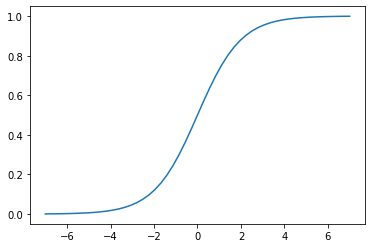

In [204]:
plt.plot(z, sigmoid(z))

You can see the negative values approach 0 and the positive values approach 1.

Now we will compare this to linear regression.

In [ ]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

Logistic regression except we calculate the result as a score, and then apply the sigmoid function.

In [ ]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

These are both called *linear* models because they both use linear calculation with weights 
- bias + *x<sub>i</sub>* x *w<sub>i</sub>*
- In both cases, they use dot products, which is called the *linear operator* in linear algebra

Linear models are important, they are fast to learn, fast to train, easy to understand.

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

Recall the similarities between linear and logistic regresson, except logistic regression applies the sigmoid function.

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train) # Data from lesson 8

LogisticRegression()

Intercept (synonym for bias). Returns array, so we just get the first element:

In [214]:
model.intercept_[0]

-0.10903412070059165

We are also interested in the coefficients. These are the weights for each feature.

In [ ]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

Let's try predicting on some data.

In [215]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

We can see that it predicts binary numbers. 0s is no churn, 1 is churn.
- These are **hard predictions**, as we already have the exact labels
- Do not know the probabilities

To get the probabilities (**soft predictions**):

In [219]:
model.predict_proba(X_train)

array([[0.90452244, 0.09547756],
       [0.3206791 , 0.6793209 ],
       [0.36632902, 0.63367098],
       ...,
       [0.46837398, 0.53162602],
       [0.957457  , 0.042543  ],
       [0.30127748, 0.69872252]])

Why are there two columns? 
- First column, probability of belonging to negative class
- Second column, probability of belonging to positive class

Interested in second class, the probability of churning. For example [-3], we can see:
- Probability of churning is 53%
- Probability of not churning is 47%

Let's see the predictions on the validation dataset. We only keep the second column

In [220]:
y_pred = model.predict_proba(X_val)[:, 1]

Let's use a threshold of 0.5 Let's see how many people we think are churning

In [221]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

Let's see the customers we think will churn:

In [224]:
df_val[churn_decision].head().T

,3,8,11,12,19
customerid,8433-wxgna,3440-jpscl,2637-fkfsy,7228-omtpn,6711-fldfb
gender,male,female,female,male,female
seniorcitizen,0,0,0,0,0
partner,no,no,yes,no,no
dependents,no,no,no,no,no
tenure,2,6,3,4,7
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,no,no,yes
internetservice,fiber_optic,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,yes,no,no,no,no


The customers to whom we would want to send promotional emails:

In [225]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

Let's get accuracy to check our model. Interested in how many are actually matching.

In [226]:
(y_val == churn_decision).mean() # Mean shows us how many match

0.8034066713981547

Let's see what's actually happening here in more detail:

In [227]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred # Soft predictions
df_pred['prediction'] = churn_decision.astype(int)  # Churn decision as integer
df_pred['actual'] = y_val   # Actual churn data

Let's look at this data:

In [229]:
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204525,0,0
2,0.212223,0,0
3,0.543038,1,1
4,0.213785,0,0
...,...,...,...
1404,0.313681,0,0
1405,0.039359,0,1
1406,0.136390,0,0
1407,0.799765,1,1


Let's compare prediction and actual. Most that we can see are correct.

In [230]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [232]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204525,0,0,True
2,0.212223,0,0,True
3,0.543038,1,1,True
4,0.213785,0,0,True
...,...,...,...,...
1404,0.313681,0,0,True
1405,0.039359,0,1,False
1406,0.136390,0,0,True
1407,0.799765,1,1,True


New variable shows us when our prediction is correct.
- E.g. customer 1405 had a very small soft prediction but still ended up churning.

Do not need to explicitly convert binary variable to get mean:

In [233]:
df_pred.correct.mean()

0.8034066713981547

In [234]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

Therefore, `(y_val == churn_decision).mean()` forms a boolean array, and we just need to get the fraction of `True`'s

In summary, we have a model that correctly predicts churn 80% of the time.

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

Recall we trained the model in 3.10. Let's see what this means

In [253]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [235]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

Comparing the feature names and the coefficients, we see the weight given for each feature. First let's explore what `.zip(a, b)` does:

In [237]:
a = [1, 2, 3, 4]
b = 'abcd'

In [239]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

We see that `.zip(a,b)` creates tuples of the two sequences given.

In [238]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

We can easily convert this into a dictionary. Let's do this for the coefficients:

In [254]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

These are the *weights* given to each feature given to the model. To better understand this, let's train a smaller model (use less features):

In [255]:
# features to use for our smaller model
small = ['contract', 'tenure', 'monthlycharges']

Let's quickly see the first 10 records of this data subset

In [256]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

Creating training and validation subsets for this smaller dataset:

In [257]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [258]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

Let's quickly look at our features:

In [259]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [260]:
X_train_small = dv_small.transform(dicts_train_small)

Fitting the model...

In [261]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

Let's look at the model interpretation. First the bias:

In [262]:
w0 = model_small.intercept_[0]
w0

-2.4767756608786127

Now let's look at the coefficients again:

In [264]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [265]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Let's see how the model predicts a feature with these weights. Using the *bias* term and the weights. This would be written as:

*g*(*x<sub>i</sub>*) = -2.47 + (*x<sub>i0</sub>*)(0.97) + (*x<sub>i1</sub>*)(-0.025) + (*x<sub>i2</sub>*)(-0.949) + (*x<sub>i3</sub>*)(0.027) + (*x<sub>i4</sub>*)(-0.036) 

For a customer with:
- A monthly contract
- $50 in monthly charges
- A 5-month tenure

We calculate:

In [267]:
g_xi = -2.47 + (1)*(0.97) + (0)*(-0.025) + (0)*(-0.949) + (50)*(0.027) + (5)*(-0.036)
g_xi

-0.3300000000000001

- Bias term is -.247. This gives a pretty low value from sigmoid (less than 10%)
    - We assume a pretty low rate of churn by default
- We effectively throw away the second two contract options (one year and two year).
- Monthly charges increase rate of churn
- Tenure lowers rate of churn

Let's illustrate this with the sigmoid function:

In [269]:
bias = sigmoid(-2.47)
contract = sigmoid(-2.47 + (1)*(0.97))
monthly = sigmoid(-2.47 + (1)*(0.97) + (50)*(0.027))
bias, contract, monthly

(0.07798823512936635, 0.18242552380635632, 0.46257015465625034)

We can see the churn rate starts out low, but then increases over 2x with a monthly contract, then increases over 2.5x with higher monthly charges.

Looking at this altogether:

In [270]:
sigmoid(g_xi)

0.41824062315816374

Can see for this customer, probability of churn is ~42%. Below our decision threshold so we are not worried.

However, what if this customer was only with us for 1 month and they had to pay $60/month?

In [272]:
g_xi = -2.47 + (1)*(0.97) + (0)*(-0.025) + (0)*(-0.949) + (60)*(0.027) + (1)*(-0.036)
g_xi

0.08399999999999966

In [275]:
sigmoid(g_xi)

0.5209876607065322

Notice the score is now positive. Sigmoid of (0) is 0.5, so whatever is above positive is above our decision threshold, so this customer is at risk of churning at 52%.

Say, a customer has:
- A 2-year contract
- $30 in monthly charges
- A 24-month tenure

We calculate:

In [276]:
g_xi = -2.47 + (0)*(0.97) + (0)*(-0.025) + (1)*(-0.949) + (30)*(0.027) + (24)*(-0.036)
g_xi

-3.473

In [277]:
# underscore is a jupyter magic variable for the result of the last cell
sigmoid(_)

0.030090303318277657

The result was negative, so the score from sigmoid is very small, ~3%.
- Recall that for a 2-year contract, we essentially drop this first two contract weights
    - With one-hot encoding, only one of the variable gets any weight to contribute to the total score

In [278]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Interpretation
- People with monthly rates have a high *positive weight*
    - Much more likely to churn than someone on a 1-year or 2-year contract which have *negative weights*

By looking at the weights for all one-hot encoding variables, we can easily see which is most important

## 3.12 Using the model

Now we will train a final model. Recall:
- We trained two models
    - Initial big model on all features
    - Small models on 3 features (did not check performance)

We will take the large model and train it on full train+val data.

Steps:
1. Train dictionary on training set.
2. Apply transformation to training set
3. Train model
4. Apply transformation to test set
5. Calculate performance

In [279]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [281]:
# Looking at the first 3 for a sanity check
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [280]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [282]:
# Do not need to separate or delete y past this as we only grabbed the feature variables from df_full_train
y_full_train = df_full_train.churn.values

In [283]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

Now applying dict vectorizer to test set:

In [284]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [287]:
# Do NOT fit on test set - just training set.
X_test = dv.transform(dicts_test)

Predict using the second row (probability of churn rather that not churn)

In [288]:
y_pred = model.predict_proba(X_test)[:, 1]

Check churn decision with decision threshold:

In [289]:
churn_decision = (y_pred >= 0.5)

In [290]:
(churn_decision == y_test).mean()

0.815471965933286

Check with y_test to see accuracy compared to validation dataset. 
- Slightly higher, which is normal. 
    - We have used more data so it makes sense. Also makes sense to be a little less accurate
- Issues arrive when the absolute difference is more than a little (e.g. 95% train vs 80% test)
    - 1% difference here is fine.

Now let's talk about using it. Recall:
- If a customer seems at risk of churning, we want to send them a promotion email

Let's look at an example customer:

In [291]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

Senior citizen with a month-to-month bill and high charges. How would we predict on this customer?
- Imagine we have a web service for a model
- This client information gets transferred over a web service to the model
- Data is transformed
- The model computes the probability and returns it

In [295]:
X_small = dv.transform([dicts_test[10]])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [296]:
X_small.shape

(1, 45)

45 features - shape makes sense. Now let's put this into the model

In [297]:
model.predict_proba(X_small)[0, 1]

0.4056810977770238

We see that this customer only has ~41% probability of churning. Low chance of churn. Let's see if he was actually going to churn:

In [298]:
y_test[10]

0

He was not going to churn. Our decision was correct.

Let's see someone who *was* going to churn:

In [299]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

We'll look at the last customer.

In [302]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

Customer is:
- not senior
- pays month-to-month
- has been with us for 17 months
- pays a lot (>$100) per month

Let's predict:

In [303]:
X_small = dv.transform([customer])

In [304]:
model.predict_proba(X_small)[0, 1]

0.5968852088124165

This is above our decision threshold. We should send her a promotional email. Let's verify if she churned:

In [ ]:
y_test[-1]

1

Decision was correct.

## 3.13 Summary

Problem: wanted to predict churn for a telecom company
- Predict customers who want to churn and send promotional email if it seems they will to change their mind.

Summary:
1. Used a [Kaggle dataset](https://www.kaggle.com/blastchar/telco-customer-churn).
    - Features like:
        - Partners
        - Dependents
        - How long they are with companies
    - Notably it has a churn field
2. Data Preparation
    - Looked at data
    - Made sure column names and values looked uniform
    - Made sure columns and values all read correctly
    - Checked if churn variable needed preparaton
3. Set up the validation framework
    - Used Scikit-Learn to perform train-test-split
        - Did twice to get train/val/test split
4. Did EDA
    - Checked null values, statistics
5. Feature importance: churn rate, risk ratio
    - Churn rate shows how likely user is to churn
        - See if certain demographics are more or less likely to churn
    - Risk ratio is the likelihood of variable to predict something (e.g. churn)
6. Feature importance: mutual information
    - One number to show how much categorical feature can tell us about the target
        - Tells us relative important of variables (e.g. contract > gender)
7. Feature importance: correlation
    - Number to see importance of numerical variables
        - Positive correlation - positive proportion
        - Negative correlation- inverse proportion
8. One-hot encoding can be implemented with `DictVectorizer`
    - Way to encode data. Used scikit-learn
9. Logistic regression - linear model like linear regression
    - Used for binary classification like this
        - Positive class - people who churn
        - Negative class - people who do not churn
    - Only difference from linear regression is that it applies sigmoid function at the end
10. Output of log reg - probability
    - Just need to use `.fit()` on vectorized data
11. Interpretation of weights is similar to linear regression
    - Trained smaller model that contained only 3 features
    - Saw importance of bias and weights.
12. Final training and usage of model - used full train dataset
    - Interpreted bias and coefficients
    - Verified performance

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

